<a href="https://colab.research.google.com/github/andraroman12/PMP-2024/blob/main/TEMA2/ex1-12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving date.csv to date (7).csv
Date încărcate:
[[-1.081  9.357]
 [-0.888  8.322]
 [-0.623  8.745]
 [-0.48   7.346]
 [-0.505  7.028]]


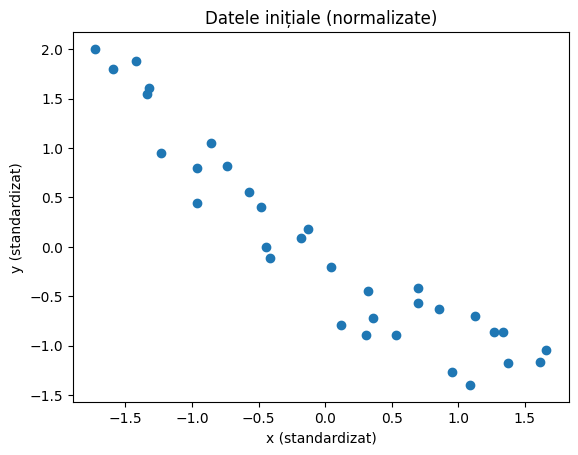

Modelul polinomial cu order=5 și sd=10 a fost ajustat cu succes!


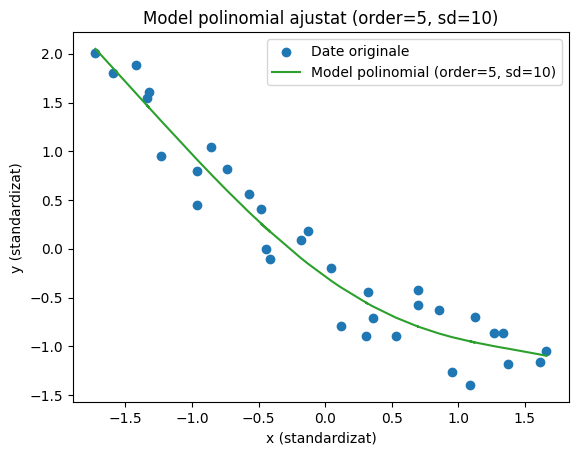

Modelul polinomial cu order=5 și sd=100 a fost ajustat cu succes!


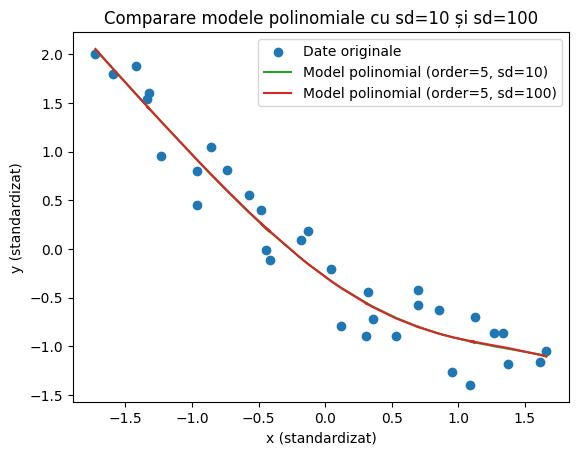

Modelul polinomial cu order=5 și sd=array a fost ajustat cu succes!


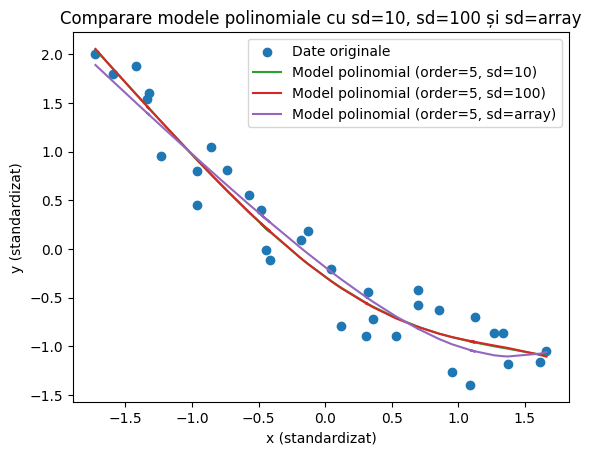

In [8]:
from google.colab import files
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import arviz as az


uploaded = files.upload()

data = np.loadtxt('date.csv', delimiter=' ')
x_1 = data[:, 0]
y_1 = data[:, 1]

print("Date încărcate:")
print(data[:5])

order = 5

x_1p = np.vstack([x_1**i for i in range(1, order + 1)])
x_1s = (x_1p - x_1p.mean(axis=1, keepdims=True)) / x_1p.std(axis=1, keepdims=True)
y_1s = (y_1 - y_1.mean()) / y_1.std()

plt.scatter(x_1s[0], y_1s)
plt.xlabel('x (standardizat)')
plt.ylabel('y (standardizat)')
plt.title('Datele inițiale (normalizate)')
plt.show()

#model polinomial cu order=5 si sd=10
with pm.Model() as model_p:
    α = pm.Normal('Intercept', mu=0, sigma=1)
    β = pm.Normal('Coeficienți', mu=0, sigma=10, shape=order)
    ε = pm.HalfNormal('Eroare', 5)
    µ = α + pm.math.dot(β, x_1s)
    y_pred = pm.Normal('y_pred', mu=µ, sigma=ε, observed=y_1s)
    trace_sd10 = pm.sample(2000, tune=1500, target_accept=0.99, return_inferencedata=True, random_seed=42)


#grafic pt model
α_post_sd10 = trace_sd10.posterior['Intercept'].mean(("chain", "draw")).values
β_post_sd10 = trace_sd10.posterior['Coeficienți'].mean(("chain", "draw")).values
y_p_post_sd10 = α_post_sd10 + np.dot(β_post_sd10, x_1s)

plt.scatter(x_1s[0], y_1s, c='C0', label='Date originale')
plt.plot(x_1s[0], y_p_post_sd10, c='C2', label=f'Model polinomial (order={order}, sd=10)')
plt.xlabel('x (standardizat)')
plt.ylabel('y (standardizat)')
plt.title(f'Model polinomial ajustat (order={order}, sd=10)')
plt.legend()
plt.show()

#model polinomial cu order=5 si sd=100
with pm.Model() as model_p_sd100:
    α = pm.Normal('Intercept', mu=0, sigma=1)
    β = pm.Normal('Coeficienți', mu=0, sigma=100, shape=order)
    ε = pm.HalfNormal('Eroare', 5)
    µ = α + pm.math.dot(β, x_1s)
    y_pred = pm.Normal('y_pred', mu=µ, sigma=ε, observed=y_1s)
    trace_sd100 = pm.sample(2000, tune=1500, target_accept=0.99, return_inferencedata=True, random_seed=42)


#grafic pt model
α_post_sd100 = trace_sd100.posterior['Intercept'].mean(("chain", "draw")).values
β_post_sd100 = trace_sd100.posterior['Coeficienți'].mean(("chain", "draw")).values
y_p_post_sd100 = α_post_sd100 + np.dot(β_post_sd100, x_1s)

plt.scatter(x_1s[0], y_1s, c='C0', label='Date originale')
plt.plot(x_1s[0], y_p_post_sd10, c='C2', label=f'Model polinomial (order={order}, sd=10)')
plt.plot(x_1s[0], y_p_post_sd100, c='C3', label=f'Model polinomial (order={order}, sd=100)')
plt.xlabel('x (standardizat)')
plt.ylabel('y (standardizat)')
plt.title('Comparare modele polinomiale cu sd=10 și sd=100')
plt.legend()
plt.show()

#model polinomial cu order=5 si sd=np.array([10, 0.1, 0.1, 0.1, 0.1])
with pm.Model() as model_p_sd_array:
    α = pm.Normal('Intercept', mu=0, sigma=1)
    β = pm.Normal('Coeficienți', mu=0, sigma=np.array([10, 0.1, 0.1, 0.1, 0.1]), shape=order)
    ε = pm.HalfNormal('Eroare', 5)
    µ = α + pm.math.dot(β, x_1s)
    y_pred = pm.Normal('y_pred', mu=µ, sigma=ε, observed=y_1s)
    trace_sd_array = pm.sample(2000, tune=1500, target_accept=0.99, return_inferencedata=True, random_seed=42)


#grafic  pt model
α_post_sd_array = trace_sd_array.posterior['Intercept'].mean(("chain", "draw")).values
β_post_sd_array = trace_sd_array.posterior['Coeficienți'].mean(("chain", "draw")).values
y_p_post_sd_array = α_post_sd_array + np.dot(β_post_sd_array, x_1s)

plt.scatter(x_1s[0], y_1s, c='C0', label='Date originale')
plt.plot(x_1s[0], y_p_post_sd10, c='C2', label=f'Model polinomial (order={order}, sd=10)')
plt.plot(x_1s[0], y_p_post_sd100, c='C3', label=f'Model polinomial (order={order}, sd=100)')
plt.plot(x_1s[0], y_p_post_sd_array, c='C4', label=f'Model polinomial (order={order}, sd=array)')
plt.xlabel('x (standardizat)')
plt.ylabel('y (standardizat)')
plt.title('Comparare modele polinomiale cu sd=10, sd=100 și sd=array')
plt.legend()
plt.show()



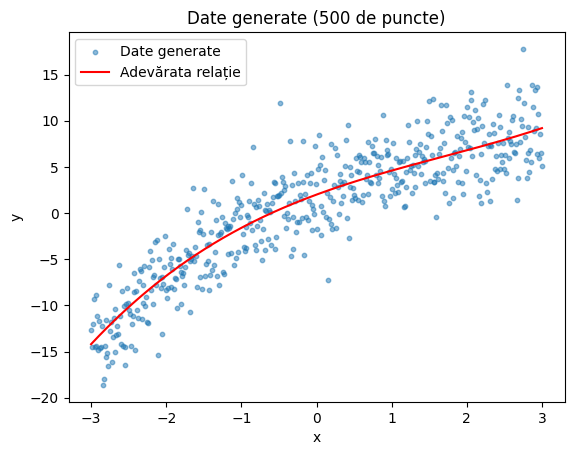

Modelul polinomial cu 500 de puncte și sd=10 a fost ajustat cu succes!


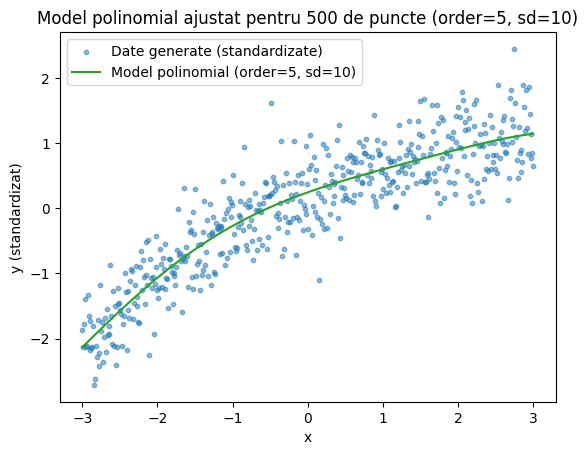

Modelul polinomial cu 500 de puncte și sd=100 a fost ajustat cu succes!


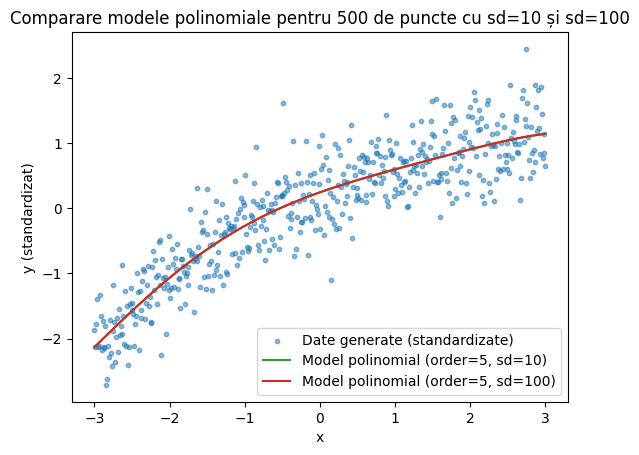

Modelul polinomial cu 500 de puncte și sd=array a fost ajustat cu succes!


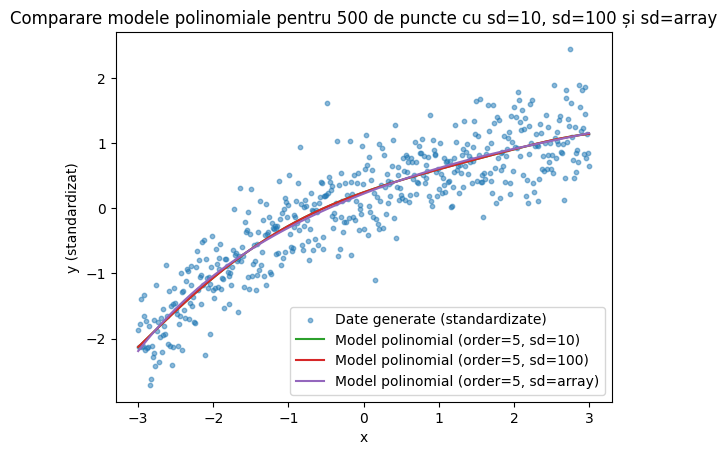

In [9]:

from google.colab import files
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import arviz as az


np.random.seed(42)
x_new = np.linspace(-3, 3, 500)
y_true = 2 + 3 * x_new - 0.5 * x_new**2 + 0.1 * x_new**3
noise = np.random.normal(0, 3, size=500)
y_new = y_true + noise

order = 5
x_new_p = np.vstack([x_new**i for i in range(1, order + 1)])
x_new_s = (x_new_p - x_new_p.mean(axis=1, keepdims=True)) / x_new_p.std(axis=1, keepdims=True)
y_new_s = (y_new - y_new.mean()) / y_new.std()

plt.scatter(x_new, y_new, s=10, alpha=0.5, label='Date generate')
plt.plot(x_new, y_true, c='r', label='Adevărata relație')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Date generate (500 de puncte)')
plt.legend()
plt.show()

#model polinomial cu order=5 si sd=10
with pm.Model() as model_p:
    α = pm.Normal('Intercept', mu=0, sigma=1)
    β = pm.Normal('Coeficienți', mu=0, sigma=10, shape=order)
    ε = pm.HalfNormal('Eroare', 5)
    µ = α + pm.math.dot(β, x_new_s)
    y_pred = pm.Normal('y_pred', mu=µ, sigma=ε, observed=y_new_s)
    trace_sd10 = pm.sample(2000, tune=1500, target_accept=0.99, return_inferencedata=True, random_seed=42)



#grafic pt  model
α_post_sd10 = trace_sd10.posterior['Intercept'].mean(("chain", "draw")).values
β_post_sd10 = trace_sd10.posterior['Coeficienți'].mean(("chain", "draw")).values
y_p_post_sd10 = α_post_sd10 + np.dot(β_post_sd10, x_new_s)

plt.scatter(x_new, y_new_s, c='C0', s=10, alpha=0.5, label='Date generate (standardizate)')
plt.plot(x_new, y_p_post_sd10, c='C2', label=f'Model polinomial (order={order}, sd=10)')
plt.xlabel('x')
plt.ylabel('y (standardizat)')
plt.title(f'Model polinomial ajustat pentru 500 de puncte (order={order}, sd=10)')
plt.legend()
plt.show()

#model polinomial cu order=5 si sd=100
with pm.Model() as model_p_sd100:
    α = pm.Normal('Intercept', mu=0, sigma=1)
    β = pm.Normal('Coeficienți', mu=0, sigma=100, shape=order)
    ε = pm.HalfNormal('Eroare', 5)
    µ = α + pm.math.dot(β, x_new_s)
    y_pred = pm.Normal('y_pred', mu=µ, sigma=ε, observed=y_new_s)
    trace_sd100 = pm.sample(2000, tune=1500, target_accept=0.99, return_inferencedata=True, random_seed=42)


#grafic pt model
α_post_sd100 = trace_sd100.posterior['Intercept'].mean(("chain", "draw")).values
β_post_sd100 = trace_sd100.posterior['Coeficienți'].mean(("chain", "draw")).values
y_p_post_sd100 = α_post_sd100 + np.dot(β_post_sd100, x_new_s)

plt.scatter(x_new, y_new_s, c='C0', s=10, alpha=0.5, label='Date generate (standardizate)')
plt.plot(x_new, y_p_post_sd10, c='C2', label=f'Model polinomial (order={order}, sd=10)')
plt.plot(x_new, y_p_post_sd100, c='C3', label=f'Model polinomial (order={order}, sd=100)')
plt.xlabel('x')
plt.ylabel('y (standardizat)')
plt.title('Comparare modele polinomiale pentru 500 de puncte cu sd=10 și sd=100')
plt.legend()
plt.show()

#model polinomial cu order=5 si sd=np.array([10, 0.1, 0.1, 0.1, 0.1])
with pm.Model() as model_p_sd_array:
    α = pm.Normal('Intercept', mu=0, sigma=1)
    β = pm.Normal('Coeficienți', mu=0, sigma=np.array([10, 0.1, 0.1, 0.1, 0.1]), shape=order)
    ε = pm.HalfNormal('Eroare', 5)
    µ = α + pm.math.dot(β, x_new_s)
    y_pred = pm.Normal('y_pred', mu=µ, sigma=ε, observed=y_new_s)
    trace_sd_array = pm.sample(2000, tune=1500, target_accept=0.99, return_inferencedata=True, random_seed=42)



#grafic pt model
α_post_sd_array = trace_sd_array.posterior['Intercept'].mean(("chain", "draw")).values
β_post_sd_array = trace_sd_array.posterior['Coeficienți'].mean(("chain", "draw")).values
y_p_post_sd_array = α_post_sd_array + np.dot(β_post_sd_array, x_new_s)

plt.scatter(x_new, y_new_s, c='C0', s=10, alpha=0.5, label='Date generate (standardizate)')
plt.plot(x_new, y_p_post_sd10, c='C2', label=f'Model polinomial (order={order}, sd=10)')
plt.plot(x_new, y_p_post_sd100, c='C3', label=f'Model polinomial (order={order}, sd=100)')
plt.plot(x_new, y_p_post_sd_array, c='C4', label=f'Model polinomial (order={order}, sd=array)')
plt.xlabel('x')
plt.ylabel('y (standardizat)')
plt.title('Comparare modele polinomiale pentru 500 de puncte cu sd=10, sd=100 și sd=array')
plt.legend()
plt.show()
